# Movie dataset 

# Description

### Import library

In [218]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

### Import dataset 

In [130]:
movies = pd.read_csv('movies.csv')

In [217]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [132]:
ratings = pd.read_csv('ratings.csv')

In [133]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [134]:
movie_data=pd.merge(ratings,movies ,on='movieId') #Join two datasets to work with them
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Movie dataset description

In [135]:
movie_data.describe() #Description of movie dataset

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [136]:
movie_data.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [137]:
nRow, nCol = movie_data.shape #Info about columns and rows
print(f'There are {nRow} rows and {nCol} columns')

There are 100836 rows and 6 columns


### Correlation between parametres

In [68]:
movie_data.corr() #Find correlation between parametres

,userId,movieId,rating,timestamp
userId,1.000000,0.006773,-0.049348,0.097151
movieId,0.006773,1.000000,-0.004061,0.503669
rating,-0.049348,-0.004061,1.000000,-0.005802
timestamp,0.097151,0.503669,-0.005802,1.000000


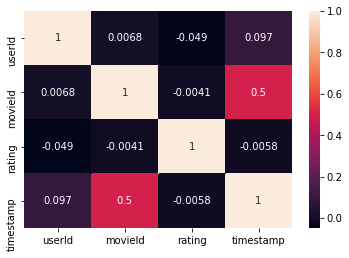

In [219]:
df_small = movie_data.iloc[:,:6] #Correlation plot between parametres
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

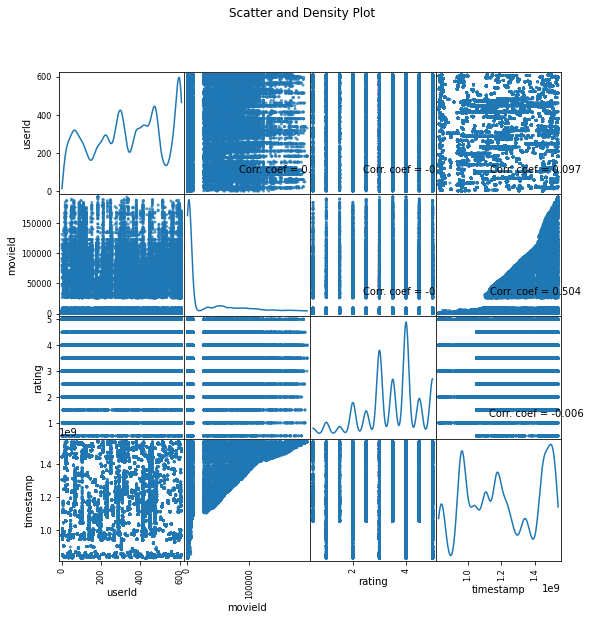

In [162]:
plotScatterMatrix(movie_data, 9, 10)

### Create X and Y matrices

In [110]:
X = movie_data[['rating', 'movieId']] #identifying X and Y
y = movie_data[['title', 'genres']]

In [111]:
X

,rating,movieId
0,4.0,1
1,4.0,1
2,4.5,1
3,2.5,1
4,4.5,1
...,...,...
100831,2.5,160341
100832,4.5,160527
100833,3.0,160836
100834,3.5,163937


In [112]:
y

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...
100831,Bloodmoon (1997),Action|Thriller
100832,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,Hazard (2005),Action|Drama|Thriller
100834,Blair Witch (2016),Horror|Thriller


### Splitting data into training set and test set 

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0) #Split data into 80/20

In [114]:
X_train

,rating,movieId
77701,2.5,2431
94477,1.5,40946
36246,3.0,4995
17483,4.5,79132
100300,3.0,74696
...,...,...
21243,4.5,1203
45891,4.0,1653
42613,4.0,72998
43567,5.0,529


In [115]:
X_test

,rating,movieId
41008,2.0,5620
94274,2.0,5573
77380,5.0,1105
29744,4.0,224
40462,4.0,5902
...,...,...
54027,3.0,7373
84234,3.5,54881
12840,5.0,2571
74661,5.0,786


In [116]:
y_train

,title,genres
77701,Patch Adams (1998),Comedy|Drama
94477,Sarah Silverman: Jesus Is Magic (2005),Comedy|Musical
36246,"Beautiful Mind, A (2001)",Drama|Romance
17483,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
100300,Last Train Home (2009),Documentary|Drama
...,...,...
21243,12 Angry Men (1957),Drama
45891,Gattaca (1997),Drama|Sci-Fi|Thriller
42613,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
43567,Searching for Bobby Fischer (1993),Drama


In [117]:
y_test

,title,genres
41008,Sweet Home Alabama (2002),Comedy|Romance
94274,Stealing Harvard (2002),Comedy|Crime
77380,Children of the Corn IV: The Gathering (1996),Horror
29744,Don Juan DeMarco (1995),Comedy|Drama|Romance
40462,Adaptation (2002),Comedy|Drama|Romance
...,...,...
54027,Hellboy (2004),Action|Adventure|Fantasy|Horror
84234,"King of Kong, The (2007)",Documentary
12840,"Matrix, The (1999)",Action|Sci-Fi|Thriller
74661,Eraser (1996),Action|Drama|Thriller


## Build classification model using K-Nearest Neighbours

In [163]:
from sklearn.neighbors import KNeighborsClassifier #import library 

In [201]:
model = KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [202]:
model.fit(X_train, y_train) #rebuild K-nearest neighbors model

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=-1,
                     n_neighbors=20)

## Prediction

In [207]:
y_pred = model.predict(X_test) #predict x_test

In [204]:
y_pred

array([['Sweet Home Alabama (2002)', 'Comedy|Romance'],
       ['Shrek 2 (2004)',
        'Adventure|Animation|Children|Comedy|Musical|Romance'],
       ['Demolition Man (1993)', 'Action|Adventure|Sci-Fi'],
       ...,
       ['Matrix, The (1999)', 'Action|Sci-Fi|Thriller'],
       ['Hudsucker Proxy, The (1994)', 'Comedy'],
       ['Usual Suspects, The (1995)', 'Crime|Mystery|Thriller']],
      dtype=object)

## Votes by users

In [180]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count') #create new parametr that count rating by movieId
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')#create new parametr that count rating by userId
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating') #produce pivot table based on 3 columns of the DataFrame
final_dataset.fillna(0,inplace=True)

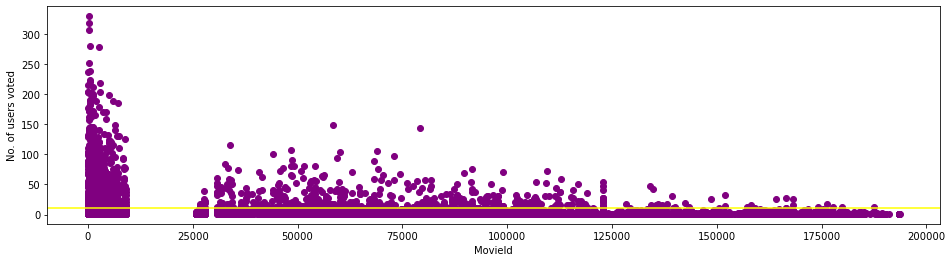

In [213]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='purple') #Create a plot that shows Number of votes and movieID, to qualify a movie
plt.axhline(y=10,color='yellow')
plt.xlabel('MovieId') #x labeled as movieID
plt.ylabel('No. of users voted') #Y labeled as Number of users vote
plt.show()

In [182]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

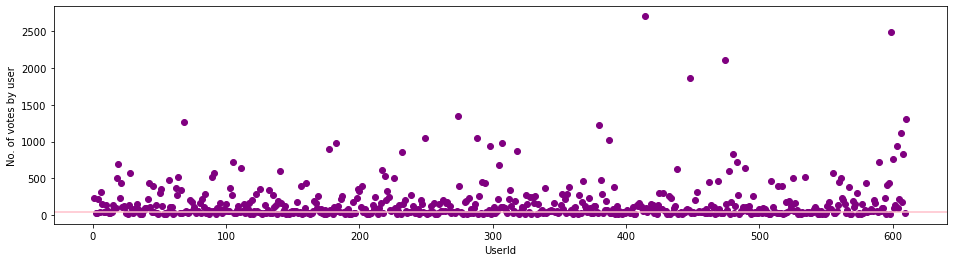

In [215]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='purple') #Create a plot that shows Number of votes and userID, to qualify a user
plt.axhline(y=50,color='pink')
plt.xlabel('UserId') #x labeled as userID
plt.ylabel('No. of votes by user') #Y labeled as Number of users vote
plt.show()

In [185]:
final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index].head(10)

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
11,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,2.5,3.0,0.0,0.0


## Movies Ratings

In [186]:
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean()) #New parametr that show mean of ratings by title
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) #show total number of ratings
trend.head()

,rating,total number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


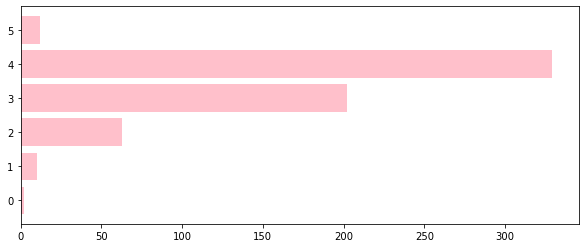

In [189]:
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='pink') #show total number of ratings with plot
plt.show()

<ipython-input-190-8671eca4e478>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


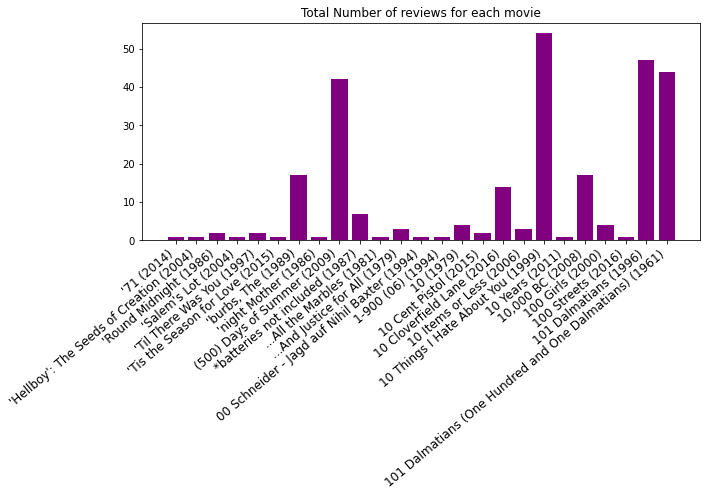

In [190]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='purple') #Bar chart show total number of votings with titles of movie
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie") #name of bar chart 
plt.show()

In [222]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head() #Title of movies with mean of ratings in ascending order

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

## Movie Recommendation

In [192]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]]) #create an array
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) ) #subtract the amount which divide by the size
print(sparsity) 

0.7333333333333334


In [195]:
csr_sample = csr_matrix(sample) #output in the form of a matrix
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [196]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [209]:
knn.fit(csr_data) #using the K-nearest neighbors model

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [210]:
def get_movie_recommendation(movie_name): #create a function
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  #define that title contains movie's name
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1] #using the K-nearest neighbors model
        
        recommend_frame = []
        #make a condition
        for val in rec_movie_indices: 
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [211]:
get_movie_recommendation('Maleficent')  #shows the films which similar in recommendations

,Title,Distance
1,"Princess Diaries, The (2001)",0.670665
2,The Hunger Games: Catching Fire (2013),0.662385
3,Sherlock Holmes: A Game of Shadows (2011),0.653615
4,Guardians of the Galaxy (2014),0.648919
5,Tangled (2010),0.647525
6,X-Men: Days of Future Past (2014),0.646349
7,Man of Steel (2013),0.637710
8,The Theory of Everything (2014),0.631956
9,A Million Ways to Die in the West (2014),0.616471
10,"Princess and the Frog, The (2009)",0.613685


In [216]:
get_movie_recommendation('Hulk') #shows the films which similar in recommendations

,Title,Distance
1,Star Wars: Episode III - Revenge of the Sith (...,0.534352
2,X-Men Origins: Wolverine (2009),0.527455
3,"League of Extraordinary Gentlemen, The (a.k.a....",0.523099
4,Spider-Man (2002),0.511391
5,Spider-Man 2 (2004),0.508522
6,X2: X-Men United (2003),0.487299
7,Hellboy (2004),0.483697
8,Fantastic Four (2005),0.442947
9,Daredevil (2003),0.412769
10,"Incredible Hulk, The (2008)",0.403415
